In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

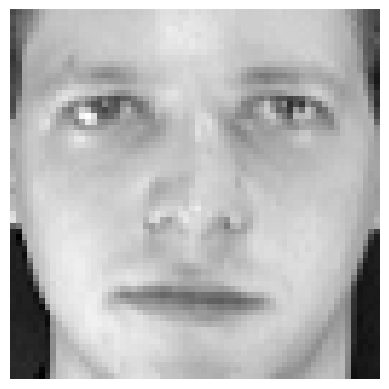

In [2]:
import matplotlib.pyplot as plt

def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

random_img = olivetti.images[0]
show_img(random_img)

Splitting the datasets into a training set, a validation set and a test set

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_val_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))

X_train_val = olivetti.data[train_val_idx]
y_train_val = olivetti.target[train_val_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, val_idx = next(strat_split.split(X_train_val, y_train_val))
X_train = X_train_val[train_idx]
y_train = y_train_val[train_idx]
X_val = X_train_val[val_idx]
y_val = y_train_val[val_idx]

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=40, random_state=42)
kmeans.fit(X_train)

val_clusters_labels = kmeans.predict(X_val)
val_clusters_labels

array([34, 18, 12, 28, 29,  1, 29,  7,  7, 20, 12,  8, 29,  6, 12, 31, 26,
       17, 34, 12, 29,  5,  2, 36, 30, 22, 14, 10, 25, 30, 10,  6,  6, 14,
       10,  7, 10, 22, 35, 15, 29, 21,  4, 30, 28, 24, 35, 32, 22, 21, 30,
       29,  9, 29, 28, 26,  6, 22, 27,  5, 23, 12, 11, 17, 25,  0, 13,  6,
       21, 21,  6,  0, 20, 11, 22, 27, 34, 19, 30, 12])

In [5]:
y_val

array([37, 16, 22,  2, 19, 14, 20, 17,  8, 32, 25,  5, 20, 21, 16,  0, 13,
       33,  4, 25, 23, 30, 17, 36,  8,  6, 35, 12, 18, 24,  3, 38, 28, 15,
       12,  4, 14,  6, 10, 23, 29, 34, 36, 22, 34,  9, 10, 35, 15,  0,  3,
       29, 24, 19,  2, 13, 28, 31,  1, 39, 27, 11,  7, 33, 18, 26, 27, 38,
       39,  7, 21, 26, 32,  9, 31,  1, 37, 30,  5, 11])

Tried to fit only 40 clusters because only 40 faces are present in the dataset, but it did not work properly as you can see

In [6]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [7]:
pca.n_components_

104

In [8]:
k_range = range(5, 150, 5)

kmeans_per_k = []
for k in k_range:
    print(f'k={k}')
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


Silhouette score

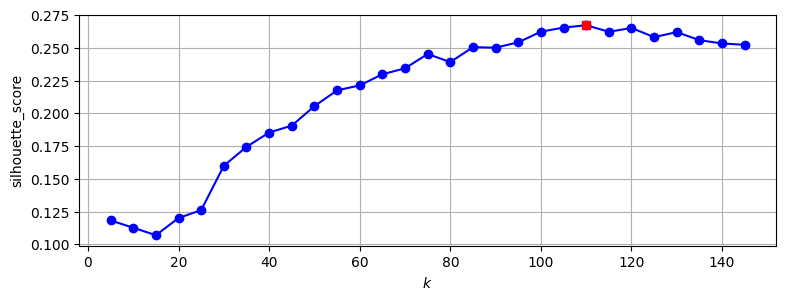

In [9]:
from sklearn.metrics import silhouette_score
import numpy as np

# inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

best_idx = np.argmax(silhouette_scores)
best_k = k_range[best_idx]
best_score = silhouette_scores[best_idx]

plt.figure(figsize=(9, 3))
# plt.plot(k_range, inertias, 'bo-')
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel("$k$")
plt.ylabel('silhouette_score')
plt.plot(best_k, best_score, 'rs')
plt.grid()
plt.show()

In [10]:
best_k

110

In [11]:
best_model = kmeans_per_k[best_idx]

Cluster 0


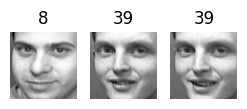

Cluster 1


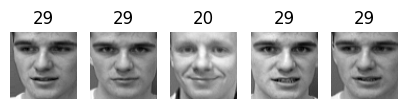

Cluster 2


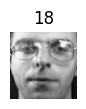

Cluster 3


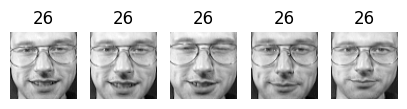

Cluster 4


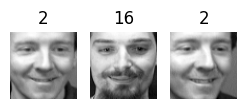

Cluster 5


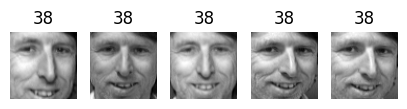

Cluster 6


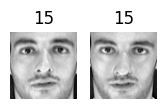

Cluster 7


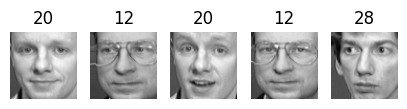

Cluster 8


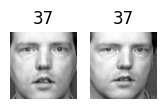

Cluster 9


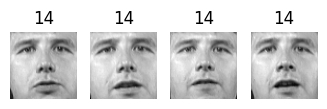

Cluster 10


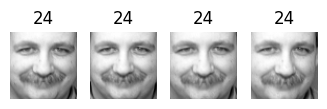

Cluster 11


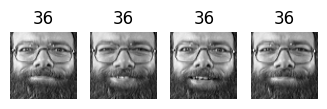

Cluster 12


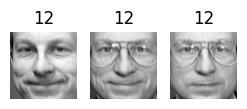

Cluster 13


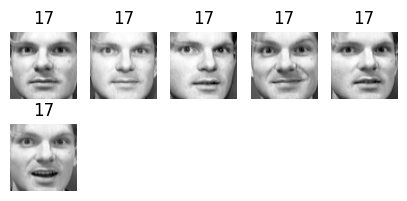

Cluster 14


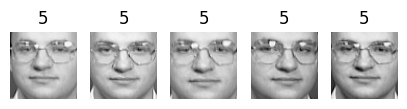

Cluster 15


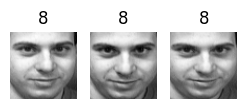

Cluster 16


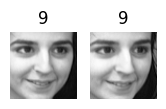

Cluster 17


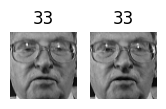

Cluster 18


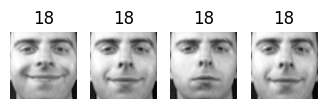

Cluster 19


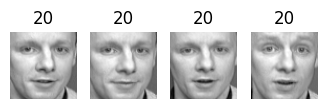

Cluster 20


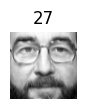

Cluster 21


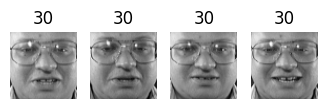

Cluster 22


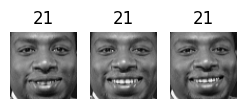

Cluster 23


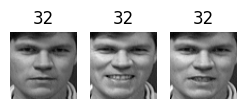

Cluster 24


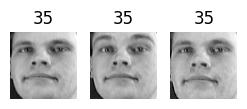

Cluster 25


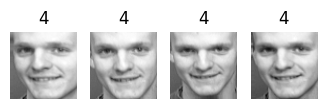

Cluster 26


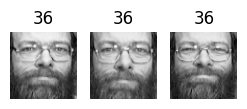

Cluster 27


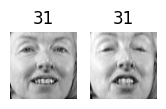

Cluster 28


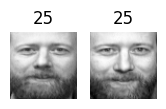

Cluster 29


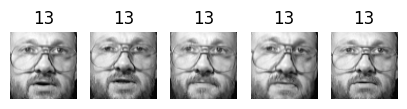

Cluster 30


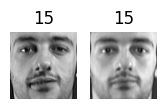

Cluster 31


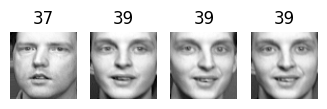

Cluster 32


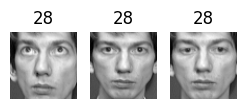

Cluster 33


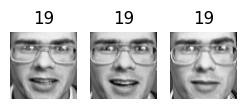

Cluster 34


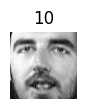

Cluster 35


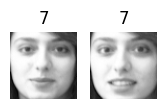

Cluster 36


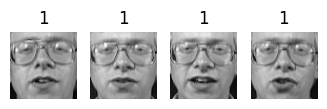

Cluster 37


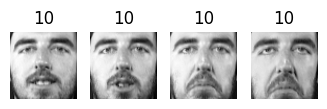

Cluster 38


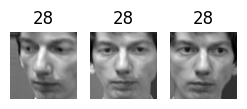

Cluster 39


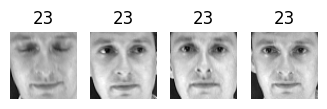

Cluster 40


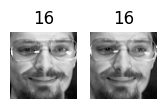

Cluster 41


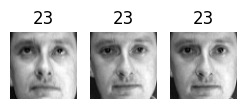

Cluster 42


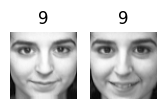

Cluster 43


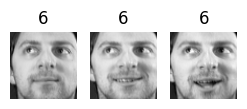

Cluster 44


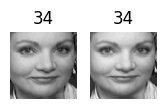

Cluster 45


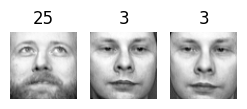

Cluster 46


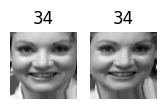

Cluster 47


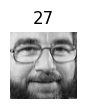

Cluster 48


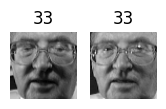

Cluster 49


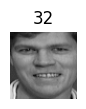

Cluster 50


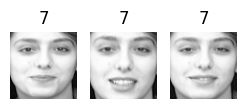

Cluster 51


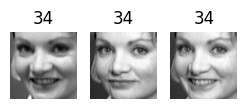

Cluster 52


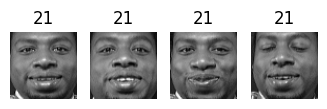

Cluster 53


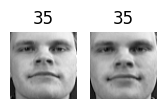

Cluster 54


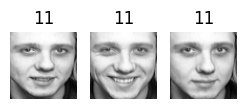

Cluster 55


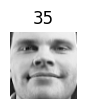

Cluster 56


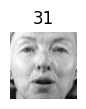

Cluster 57


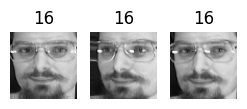

Cluster 58


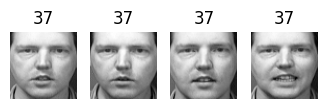

Cluster 59


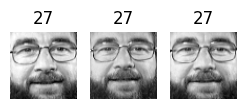

Cluster 60


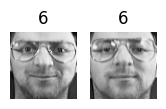

Cluster 61


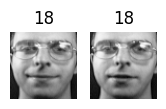

Cluster 62


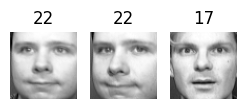

Cluster 63


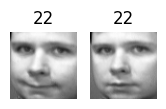

Cluster 64


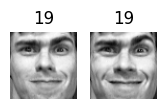

Cluster 65


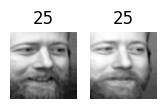

Cluster 66


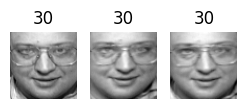

Cluster 67


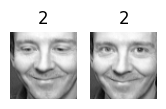

Cluster 68


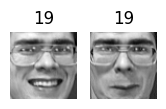

Cluster 69


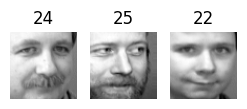

Cluster 70


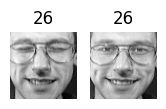

Cluster 71


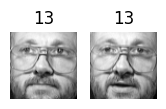

Cluster 72


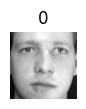

Cluster 73


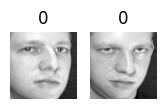

Cluster 74


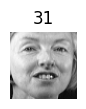

Cluster 75


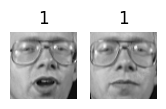

Cluster 76


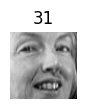

Cluster 77


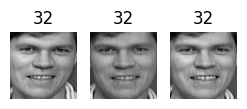

Cluster 78


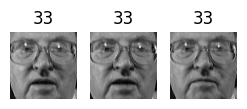

Cluster 79


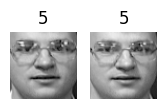

Cluster 80


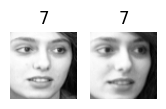

Cluster 81


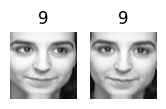

Cluster 82


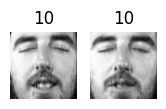

Cluster 83


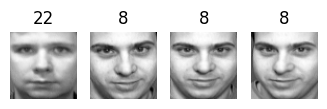

Cluster 84


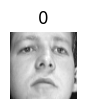

Cluster 85


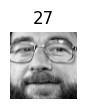

Cluster 86


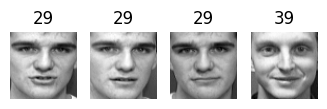

Cluster 87


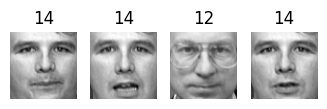

Cluster 88


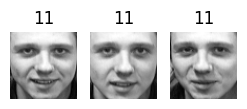

Cluster 89


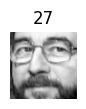

Cluster 90


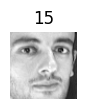

Cluster 91


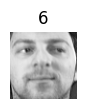

Cluster 92


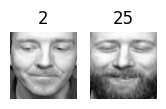

Cluster 93


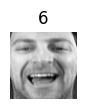

Cluster 94


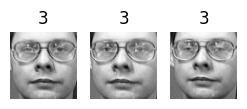

Cluster 95


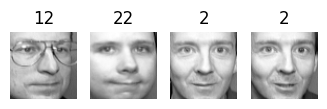

Cluster 96


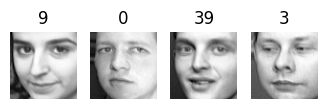

Cluster 97


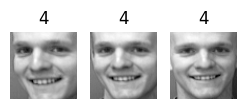

Cluster 98


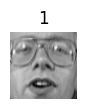

Cluster 99


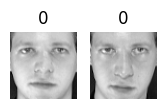

Cluster 100


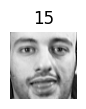

Cluster 101


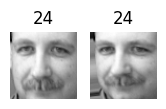

Cluster 102


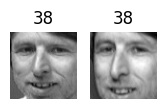

Cluster 103


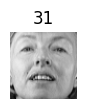

Cluster 104


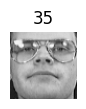

Cluster 105


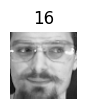

Cluster 106


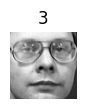

Cluster 107


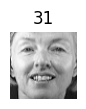

Cluster 108


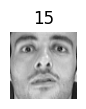

Cluster 109


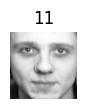

In [12]:
# taken from code
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap='gray')
        plt.axis('off')
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print('Cluster', cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Using Clustering as Preprocessing for Classification

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_val_pca, y_val)

0.95

In [14]:
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced = best_model.transform(X_val_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_val_reduced, y_val)

0.7375

In [15]:
from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_val_pca, y_val))

5 0.4625
10 0.575
15 0.6
20 0.6875
25 0.625
30 0.675
35 0.7
40 0.75
45 0.7375
50 0.725
55 0.725
60 0.75
65 0.7375
70 0.7625
75 0.7625
80 0.7625
85 0.725
90 0.7375
95 0.75
100 0.7375
105 0.775
110 0.7375
115 0.7625
120 0.7625
125 0.775
130 0.7375
135 0.7625
140 0.7875
145 0.75


In [16]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_val_extended = np.c_[X_val_pca, X_val_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [17]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_val_extended, y_val)

0.85